# Spotify Project - Week 4 

#### # 1: Bring in Imports

In [73]:
import pandas as pd
import requests
import spotipy
import spotify
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt



#### #2: Spotify Authentication 

In [38]:
client_id = 'f794d864c17e4bad87ec059ec2a15138'
client_secret = 'a8922ecf773b4fd190a9f437fadbedfb'
redirect_uri = "http://localhost:3000"
scope = "user-library-read"
s_p = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))



### #3: Get liked songs

In [40]:
results = s_p.current_user_saved_tracks()
liked_songs = results["items"]
print("Retrival success")


Retrival success


#### #4: Build a table with liked songs and names of the artist 

In [41]:
results = s_p.current_user_saved_tracks()
liked_song_names = []
liked_artists = []


for item in results['items']:
    track = item['track']
    liked_song_names.append(track['name'])
    liked_artists.append(track['artists'][0]['name'])


df_liked_songs = pd.DataFrame({'Track Name': liked_song_names, 'Artist': liked_artists})

liked_songs_uris = [item['track']['uri'] for item in results['items']]
audio_features_list = []

for uri in liked_songs_uris:
    audio_features = s_p.audio_features(uri)
    audio_features_list.append(audio_features[0])

df_audio_features = pd.DataFrame(audio_features_list)


df_liked_songs.head(10)


,Track Name,Artist
0,Better,Khalid
1,Tequila,Dan + Shay
2,Tennessee Whiskey,Chris Stapleton
3,Heaven,Kane Brown
4,You Make It Easy,Jason Aldean
5,In Case You Didn't Know,Brett Young
6,Speechless,Dan + Shay
7,Hurricane,Luke Combs
8,She Got the Best of Me,Luke Combs
9,My Girl,The Temptations


#### Show the table with the audio feautures of the songs

In [42]:
df_audio_features.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.596,0.552,0,-10.278,0,0.0970,0.0765,0.3340,0.1040,0.112,97.949,audio_features,6zeeWid2sgw4lap2jV61PZ,spotify:track:6zeeWid2sgw4lap2jV61PZ,https://api.spotify.com/v1/tracks/6zeeWid2sgw4...,https://api.spotify.com/v1/audio-analysis/6zee...,229320,4
1,0.489,0.581,11,-5.731,1,0.0281,0.0312,0.0000,0.1320,0.494,86.016,audio_features,42fw0rxRO2xbesF6mJfd4Y,spotify:track:42fw0rxRO2xbesF6mJfd4Y,https://api.spotify.com/v1/tracks/42fw0rxRO2xb...,https://api.spotify.com/v1/audio-analysis/42fw...,196747,4
2,0.392,0.370,9,-10.888,1,0.0298,0.2050,0.0096,0.0821,0.512,48.718,audio_features,3fqwjXwUGN6vbzIwvyFMhx,spotify:track:3fqwjXwUGN6vbzIwvyFMhx,https://api.spotify.com/v1/tracks/3fqwjXwUGN6v...,https://api.spotify.com/v1/audio-analysis/3fqw...,293293,4
3,0.677,0.556,9,-6.544,1,0.0306,0.2630,0.0000,0.1050,0.521,80.006,audio_features,1HXy5I3HTWq8OvxCn0z7G7,spotify:track:1HXy5I3HTWq8OvxCn0z7G7,https://api.spotify.com/v1/tracks/1HXy5I3HTWq8...,https://api.spotify.com/v1/audio-analysis/1HXy...,179507,4
4,0.375,0.574,7,-5.305,1,0.0315,0.1430,0.0000,0.1100,0.406,132.025,audio_features,6EGAfJaLUFzhS4zRBIEQ2J,spotify:track:6EGAfJaLUFzhS4zRBIEQ2J,https://api.spotify.com/v1/tracks/6EGAfJaLUFzh...,https://api.spotify.com/v1/audio-analysis/6EGA...,196800,3
5,0.607,0.536,10,-7.306,1,0.0305,0.3860,0.0000,0.1020,0.434,147.986,audio_features,10M2Ex445zw585Ducldzkw,spotify:track:10M2Ex445zw585Ducldzkw,https://api.spotify.com/v1/tracks/10M2Ex445zw5...,https://api.spotify.com/v1/audio-analysis/10M2...,224853,4
6,0.616,0.438,1,-5.968,1,0.0298,0.3560,0.0000,0.2400,0.386,135.929,audio_features,3GJ4hzg4lrGwU51Y3VARbF,spotify:track:3GJ4hzg4lrGwU51Y3VARbF,https://api.spotify.com/v1/tracks/3GJ4hzg4lrGw...,https://api.spotify.com/v1/audio-analysis/3GJ4...,213387,4
7,0.464,0.813,10,-6.185,1,0.0416,0.0153,0.0000,0.2540,0.515,75.977,audio_features,6xHI9KjUjYT0FPtGO8Mxa1,spotify:track:6xHI9KjUjYT0FPtGO8Mxa1,https://api.spotify.com/v1/tracks/6xHI9KjUjYT0...,https://api.spotify.com/v1/audio-analysis/6xHI...,222533,4
8,0.533,0.907,11,-3.793,1,0.0406,0.0292,0.0000,0.3860,0.700,150.990,audio_features,698eQRku24PIYPQPHItKlA,spotify:track:698eQRku24PIYPQPHItKlA,https://api.spotify.com/v1/tracks/698eQRku24PI...,https://api.spotify.com/v1/audio-analysis/698e...,183160,4
9,0.572,0.418,0,-10.738,1,0.0349,0.6350,0.0000,0.0961,0.694,104.566,audio_features,745H5CctFr12Mo7cqa1BMH,spotify:track:745H5CctFr12Mo7cqa1BMH,https://api.spotify.com/v1/tracks/745H5CctFr12...,https://api.spotify.com/v1/audio-analysis/745H...,165000,4


### Visuals

In [47]:
df1 = df_audio_features
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.596,0.552,0,-10.278,0,0.0970,0.0765,0.3340,0.1040,0.112,97.949,audio_features,6zeeWid2sgw4lap2jV61PZ,spotify:track:6zeeWid2sgw4lap2jV61PZ,https://api.spotify.com/v1/tracks/6zeeWid2sgw4...,https://api.spotify.com/v1/audio-analysis/6zee...,229320,4
1,0.489,0.581,11,-5.731,1,0.0281,0.0312,0.0000,0.1320,0.494,86.016,audio_features,42fw0rxRO2xbesF6mJfd4Y,spotify:track:42fw0rxRO2xbesF6mJfd4Y,https://api.spotify.com/v1/tracks/42fw0rxRO2xb...,https://api.spotify.com/v1/audio-analysis/42fw...,196747,4
2,0.392,0.370,9,-10.888,1,0.0298,0.2050,0.0096,0.0821,0.512,48.718,audio_features,3fqwjXwUGN6vbzIwvyFMhx,spotify:track:3fqwjXwUGN6vbzIwvyFMhx,https://api.spotify.com/v1/tracks/3fqwjXwUGN6v...,https://api.spotify.com/v1/audio-analysis/3fqw...,293293,4
3,0.677,0.556,9,-6.544,1,0.0306,0.2630,0.0000,0.1050,0.521,80.006,audio_features,1HXy5I3HTWq8OvxCn0z7G7,spotify:track:1HXy5I3HTWq8OvxCn0z7G7,https://api.spotify.com/v1/tracks/1HXy5I3HTWq8...,https://api.spotify.com/v1/audio-analysis/1HXy...,179507,4
4,0.375,0.574,7,-5.305,1,0.0315,0.1430,0.0000,0.1100,0.406,132.025,audio_features,6EGAfJaLUFzhS4zRBIEQ2J,spotify:track:6EGAfJaLUFzhS4zRBIEQ2J,https://api.spotify.com/v1/tracks/6EGAfJaLUFzh...,https://api.spotify.com/v1/audio-analysis/6EGA...,196800,3


In [68]:
df1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

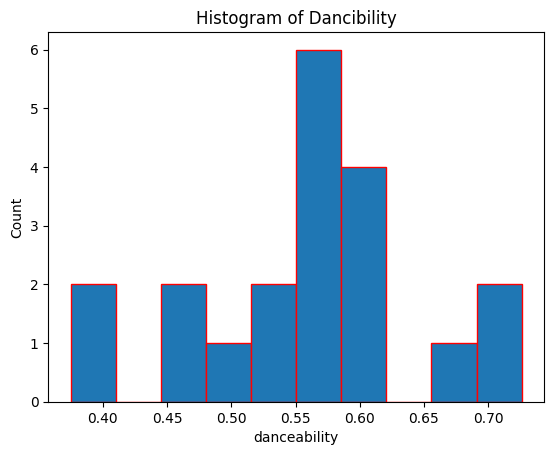

In [48]:
# Histogram for 'danceability'

plt.hist(df1['danceability'], bins=10, edgecolor='red')
plt.xlabel('danceability')
plt.ylabel('Count')
plt.title('Histogram of Dancibility')
plt.show()

In [61]:
px.histogram(df1, 'energy',
             title= 'Enery of the songs')

In [59]:
px.box(df1, y ='liveness',
       title = 'Box plot of the liveliness of the songs')

In [58]:
px.violin(df1, y='tempo',
          title = 'Violin graph of Total tempo of the songs',)

In [67]:
fig = px.imshow(df1, text_auto=True)
fig.update_xaxes(side='bottom')
fig.show()

In [72]:
px.box(df1, y ='duration_ms',
       title = 'Box plot of the Duration of the songs')

### Analysis 

Looking over the graphs and seeing that the songs that I tend to listen to the most are slow tempo music, somewhat danceable, not very lively music, meaning more calm music. Also that they do not have a lot of every. Overall, according to the music I like, Spotify could def recommend more calm, slow songs. 